In [1]:
import sys
ws = r'C:\Users\Mel.Meng\Documents\GitHub\hhnote\hydraulics\forcemain'
sys.path.append(ws)
from friction import *
from icm import *
import os

# SWMM5/ICM SWMM5 Force Main Friction Loss Check

The results from the ICM SWMM5 model is exported as CSV files, and the simulated friction loss was compared to the loss calculated from simulated veloicty and pipe depth to check the engine calculation.

In this notebook, we show 
* model the pipe as gravity pipe
* model the pipe as force main with Hazen-William equation

In [13]:
# load the results from the exported csv file
folder =  os.path.join(ws, 'model/swmm5')
run_name = 'force_main_DWF'
sim = load_result_csv(folder, run_name)

In [14]:
# calculate the friction loss for simulated, and derive the ones from velocity and depth
# model parameters
l = 100 #ft length
n = 0.0097 # manning's n
c = 120 # hw c factor
q = 0 # cfs flow
d = 1 # ft diameter
dz = 11 # force main z difference ft
# get the full pipe R
V, R = full_pipe_vr(q, d)

Text(0.5, 1.0, 'gravity: gravity_us - gravity_ds')

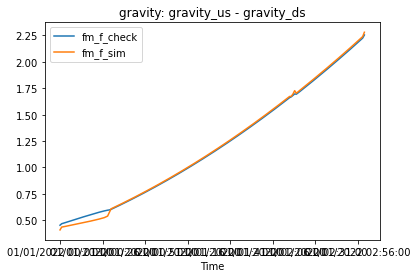

In [18]:
# Gravity pipe
link_id='gravity'
us_node_id='gravity_us'
ds_node_id='gravity_ds'
df = get_link_results(sim, link_id, us_node_id, ds_node_id)
#calculate the simulated friction loss
df['fm_f_sim'] = df['us_head'] - df['ds_head']

#calculate the friction loss assuming full pipe flow manning_sf(n, R, V)
df['fm_f_check'] = df.apply(lambda x: l*manning_sf(n, R, x['velocity']), axis=1)
ax = df.loc[:, ['fm_f_check', 'fm_f_sim']].plot()
ax.set_title('{}: {} - {}'.format(link_id, us_node_id, ds_node_id))

Text(0.5, 1.0, 'HW equation forcemain: fm_us - fm_ds')

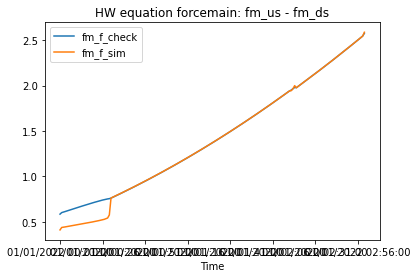

In [16]:
# Forcemain pipe HW
link_id='forcemain'
us_node_id='fm_us'
ds_node_id='fm_ds'
df = get_link_results(sim, link_id, us_node_id, ds_node_id)
#calculate the simulated friction loss
df['fm_f_sim'] = df['us_head'] - df['ds_head']

#calculate the friction loss assuming full pipe flow
df['fm_f_check'] = df.apply(lambda x: l*hw_sf(c, R, x['velocity']), axis=1)
ax = df.loc[:, ['fm_f_check', 'fm_f_sim']].plot()
ax.set_title('HW equation {}: {} - {}'.format(link_id, us_node_id, ds_node_id))

In [17]:
# setup the calculation for the dw friction loss
r = 0.5 #ft
h = 0.25 #ft
e = 0.01/12.0 #ft
v = 9 # fps

def dw_sf2(r, h, e, v):
    hrad = get_r(r, h)
    re = get_re(hrad, v)
    f = get_fricfactor(e, hrad, re)
    h = dw_sf(f, v, hrad)
    return h
print(dw_sf2(r, h, e, v))

0.04725521645669676


Text(0.5, 1.0, 'DW equation forcemain: fm_us - fm_ds')

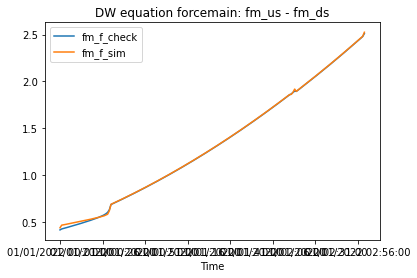

In [11]:
run_name = 'force_main dw_dw DWF'
sim = load_result_csv(folder, run_name)
# Forcemain pipe DW
link_id='forcemain'
us_node_id='fm_us'
ds_node_id='fm_ds'
df = get_link_results(sim, link_id, us_node_id, ds_node_id)
#calculate the simulated friction loss
df['fm_f_sim'] = df['us_head'] - df['ds_head']

#calculate the friction loss assuming full pipe flow
df['fm_f_check'] = df.apply(lambda x: l*dw_sf2(d/2.0, x['depth'], e, x['velocity']), axis=1)
ax = df.loc[:, ['fm_f_check', 'fm_f_sim']].plot()
ax.set_title('DW equation {}: {} - {}'.format(link_id, us_node_id, ds_node_id))